In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

ModuleNotFoundError: No module named 'numpy'

In [ ]:
# Loading the dataset
df = pd.read_csv("./dataset/covid19.csv")

In [ ]:
# Exploring the dataset

In [ ]:
print("Dataset shape: ", df.shape)

Dataset shape:  (1048575, 21)


In [ ]:
print("Dataset columns: ", df.columns)

Dataset columns:  Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')


In [ ]:
# Checking for missing values
# Calculate the sum of missing values for each column
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                          0
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64


In [ ]:
# Handling missing values
# replace all null/missing values with 0
df = df.fillna(0)

In [ ]:
# DATE_DIED: 9999-99-99 means the patient is alive
# Replacing 9999-99-99 with 0
df["DATE_DIED"] = df["DATE_DIED"].replace("9999-99-99", 0)
df["DATE_DIED"] = df["DATE_DIED"].replace(r'.*', 1, regex=True)

/tmp/ipykernel_17773/22766870.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["DATE_DIED"] = df["DATE_DIED"].replace(r'.*', 1, regex=True)


In [ ]:
# Splitting the dataset into features and target variable
X = df.drop("DATE_DIED", axis=1)
y = df["DATE_DIED"]

In [ ]:
# Performing one-hot encoding on the categorical columns
categorical_cols = ["SEX", "PATIENT_TYPE"]
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_encoded = X_encoded.astype(int)

# Converting the encoded columns to 0s and 1s
X_encoded = X_encoded.replace({0: 0, 1: 1})

# update the df variable with the encoded columns
X = X_encoded

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Model training and evaluation

# Improve model performance using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search
param_grid = {'bootstrap': [True, False],
              'max_depth': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28],
              'n_estimators': [100, 200, 300]}

# Create a based model
# rf = RandomForestClassifier()

# Instantiate the grid search model
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the grid search to the data

# grid_search.fit(X_train, y_train)
'''
Best parameters:  {'bootstrap': True, 'max_depth': 12, 'n_estimators': 300}
Best estimator:  RandomForestClassifier(max_depth=12, n_estimators=300)
Best score:  0.7939153113761478
'''

# Print the best parameters
'''
print("Best parameters: ", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)
print("Best score: ", grid_search.best_score_)
'''

'\nprint("Best parameters: ", grid_search.best_params_)\nprint("Best estimator: ", grid_search.best_estimator_)\nprint("Best score: ", grid_search.best_score_)\n'

In [ ]:
model = RandomForestClassifier(bootstrap=True, max_depth=12, n_estimators=300, n_jobs=-1, random_state=42, verbose=1)

In [ ]:
# Training the model
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


RandomForestClassifier(max_depth=12, n_estimators=300, n_jobs=-1,
                       random_state=42, verbose=1)

In [ ]:
# Making predictions on the test set
y_pred = model.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    2.8s finished


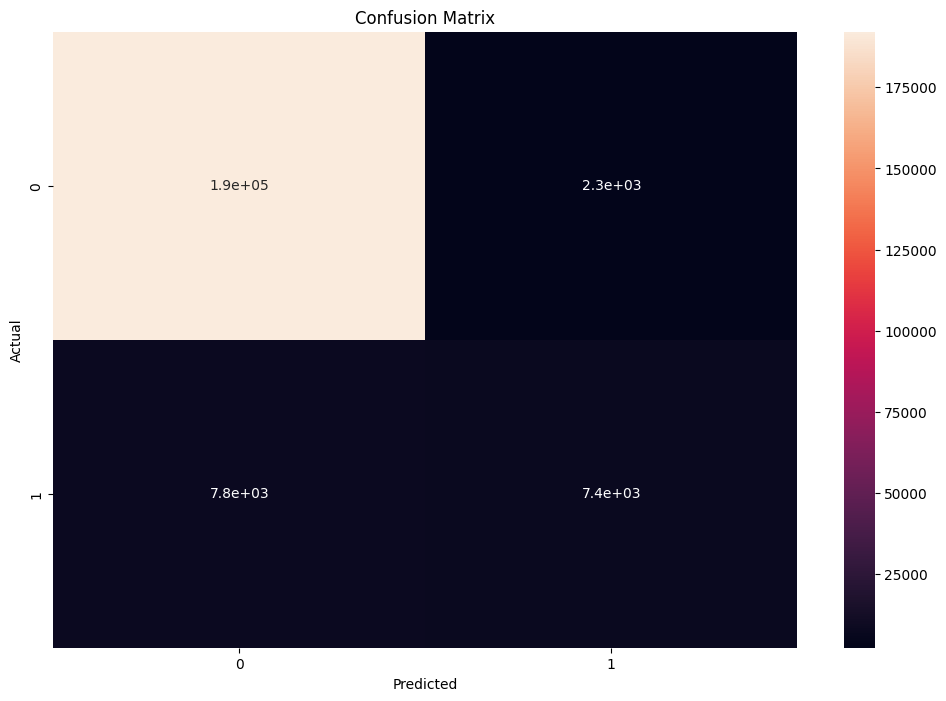

Accuracy:  0.9514865412583745
Confusion matrix:
 [[192132   2343]
 [  7831   7409]]


In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


print("Accuracy: ", accuracy)
print("Confusion matrix:\n", conf_matrix)

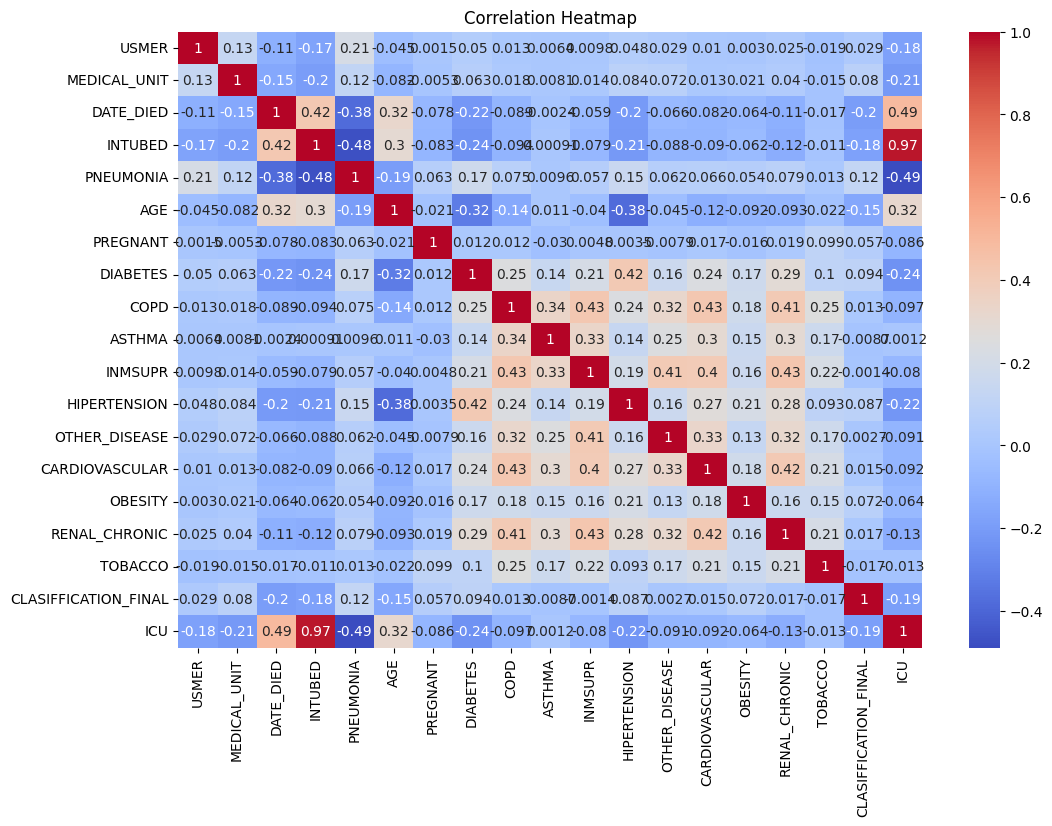

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

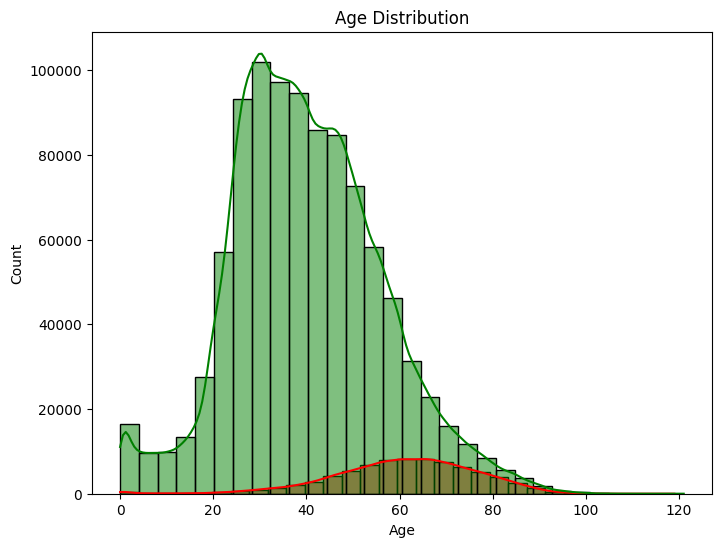

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df["DATE_DIED"] == 1]["AGE"], bins=30, kde=True, color="red")
sns.histplot(df[df["DATE_DIED"] == 0]["AGE"], bins=30, kde=True, color="green")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

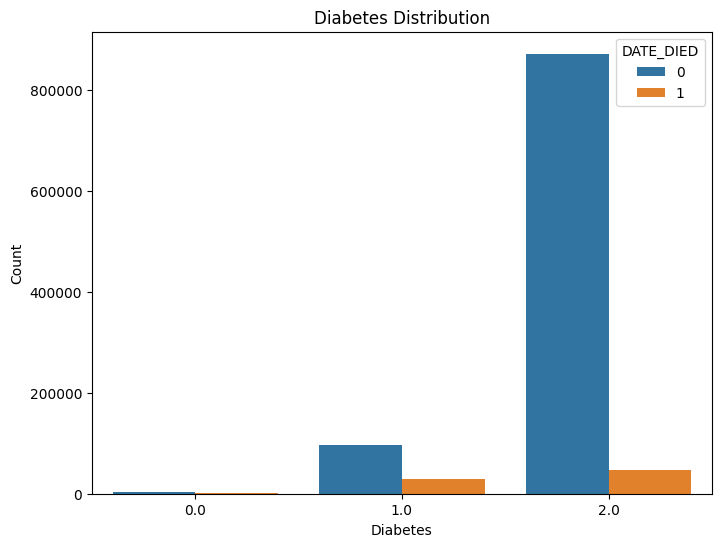

In [ ]:
# make graph to see number of people who died with diabetes and without diabetes
plt.figure(figsize=(8, 6))
sns.countplot(x="DIABETES", hue="DATE_DIED", data=df)
plt.title("Diabetes Distribution")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()